# Line Angle Calculation

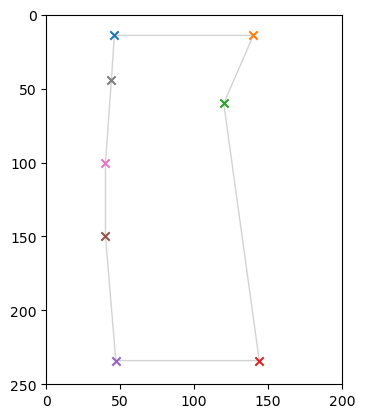

In [1]:
import numpy as np
import matplotlib.pyplot as plt


corner_points = np.array([
    [ 14,  46],
    [ 14, 140],
    [ 60, 120],
    [234, 144],
    [234,  47],
    [150,  40],
    [100,  40],
    [ 44,  44],
])


def draw_polygon(points, angles=[]):
    _, ax = plt.subplots()
    canvas = np.zeros((250, 200))
    ax.set_xlim(0, canvas.shape[1])
    ax.set_ylim(canvas.shape[0], 0)
    ax.set_aspect('equal')

    # Draw polygon
    polygon = plt.Polygon(
        np.flip(points),
        edgecolor='lightgray', 
        fill=None,
    )
    ax.add_patch(polygon)

    for point in points:
        ax.scatter(point[1], point[0], marker="x")

    # Draw angle text
    for i, angle in enumerate(angles):
        ax.text(
            points[i][1], 
            points[i][0], 
            f"{angle:+.1f}°",
            fontsize=10,
            ha="left", 
            va="bottom",
            rotation=30,
            bbox=dict(facecolor="white", alpha=0.5, edgecolor="none"),
        )
    
    plt.show()

draw_polygon(corner_points)

In [2]:
def get_point_angles_in_deg(points):
    # The vectors are differences of coordinates
    # a points into the point, b out of the point
    a = points - np.roll(points, 1, axis=0)
    b = np.roll(a, -1, axis=0) # same but shifted

    # Calculate length of those vectors
    aLengths = np.linalg.norm(a, axis=1)
    bLengths = np.linalg.norm(b, axis=1)

    # Calculate length of the cross product
    # Since 2D (not 3D) cross product can't result in a vector, just its z-component
    crossproducts = np.cross(a, b) / aLengths / bLengths
    
    angles = np.arcsin(crossproducts)
    
    return angles / np.pi * 180

In [3]:
angles_degrees = get_point_angles_in_deg(corner_points)
(abs_angles := np.abs(angles_degrees))

array([86.18592517, 66.50143432, 31.35187898, 82.1466867 , 85.23635831,
        4.76364169,  4.08561678,  0.27154195])

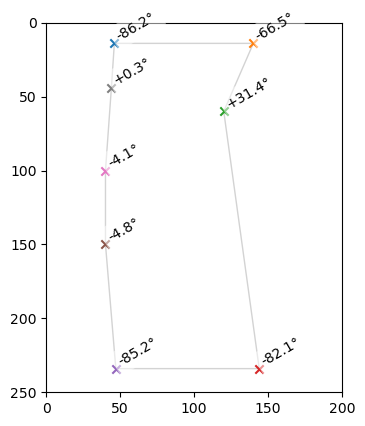

In [4]:
draw_polygon(
    corner_points,
    get_point_angles_in_deg(corner_points),
)

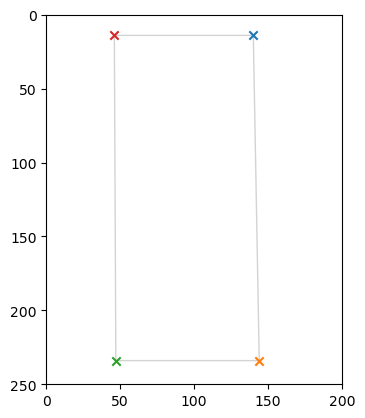

In [5]:
abs_angles_sorted = np.argsort(abs_angles)
corners_final = corner_points[abs_angles_sorted][-4:]
draw_polygon(corners_final)